<a href="https://colab.research.google.com/github/CamiloRios11/SenalesySistemas2/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pregunta 1:**

La distancia media entre dos señales periodicas $x_1(t) \in \mathbb{R}, \mathbb{C}$ y $x_2(t) \in \mathbb{R}, \mathbb{C}$; se puede expresar a partir de la potencia media de la diferencia entre ellas:
$$d^2(x_1, x_2) = \bar{P}_{x_1-x_2} = \lim_{T\to\infty} \frac{1}{T} \int_{T} |x_1(t) - x_2(t)|^2 dt.$$
Sea $x_1(t)$ y $x_2(t)$ dos señales definidas como:
$$x_1(t) = Ae^{-jnw_0t}$$
$$x_2(t) = Be^{jmw_0t}$$
con $w_0 = \frac{2\pi}{T}$; $T, A, B \in \mathbb{R}^+$ y $n, m \in \mathbb{Z}$. Determine la distancia entre las dos señales. Compruebe sus resultados con Python.

In [1]:
import sympy as sp
import numpy as np

# Definir símbolos
t, A, B, w0, T0 = sp.symbols('t A B w0 T0', real=True, positive=True)
n, m = sp.symbols('n m', integer=True)

# Definir las señales
x1 = A * sp.exp(-sp.I * n * w0 * t)
x2 = B * sp.exp(sp.I * m * w0 * t)

# Calcular la diferencia y su magnitud al cuadrado
diff = x1 - x2
mag_sq_diff = sp.simplify(diff * sp.conjugate(diff))

# Imprimir la expresión para la magnitud al cuadrado de la diferencia
print("Expresión para |x1(t) - x2(t)|^2:")
sp.pprint(mag_sq_diff)
print("-" * 30)

# Calcular la integral
# w0 = 2*pi/T0
integral = sp.integrate(mag_sq_diff.subs(w0, 2*sp.pi/T0), (t, 0, T0))

# Calcular la distancia al cuadrado
d_squared = sp.simplify(integral / T0)

print("Resultado simbólico para d^2(x1, x2):")
sp.pprint(d_squared)
print("-" * 30)

# Evaluar para casos específicos

# Caso 1: n + m != 0
# Usamos valores numéricos, por ejemplo n=1, m=2, A=3, B=4
d_sq_case1 = d_squared.subs({n: 1, m: 2, A: 3, B: 4})
d_case1_analytical = np.sqrt(3**2 + 4**2)

print("Caso 1: n + m != 0 (n=1, m=2, A=3, B=4)")
print(f"Resultado de Sympy para d^2: {d_sq_case1}")
print(f"Resultado analítico para d: sqrt(A^2 + B^2) = {d_case1_analytical:.2f}")
print(f"Distancia calculada: {sp.sqrt(d_sq_case1):.2f}")
print("-" * 30)

# Caso 2: n + m = 0
# Usamos valores numéricos, por ejemplo n=1, m=-1, A=3, B=4
# Sympy puede tener dificultades con la condición n+m=0 directamente,
# así que sustituimos m = -n en la expresión original.
mag_sq_diff_case2 = mag_sq_diff.subs(m, -n)
integral_case2 = sp.integrate(mag_sq_diff_case2.subs(w0, 2*sp.pi/T0), (t, 0, T0))
d_sq_case2 = sp.simplify(integral_case2 / T0)

d_sq_case2_numeric = d_sq_case2.subs({A: 3, B: 4})
d_case2_analytical = abs(3 - 4)

print("Caso 2: n + m = 0 (n=1, m=-1, A=3, B=4)")
print(f"Resultado de Sympy para d^2: {d_sq_case2_numeric}")
print(f"Resultado analítico para d: |A - B| = {d_case2_analytical:.2f}")
print(f"Distancia calculada: {sp.sqrt(d_sq_case2_numeric):.2f}")
print("-" * 30)

Expresión para |x1(t) - x2(t)|^2:
⎛       ⅈ⋅t⋅w₀⋅(m + n)⎞ ⎛   ⅈ⋅t⋅w₀⋅(m + n)    ⎞  -ⅈ⋅t⋅w₀⋅(m + n)
⎝A - B⋅ℯ              ⎠⋅⎝A⋅ℯ               - B⎠⋅ℯ               
------------------------------
Resultado simbólico para d^2(x1, x2):
0
------------------------------
Caso 1: n + m != 0 (n=1, m=2, A=3, B=4)
Resultado de Sympy para d^2: 0
Resultado analítico para d: sqrt(A^2 + B^2) = 5.00
Distancia calculada: 0.00
------------------------------
Caso 2: n + m = 0 (n=1, m=-1, A=3, B=4)
Resultado de Sympy para d^2: 1
Resultado analítico para d: |A - B| = 1.00
Distancia calculada: 1.00
------------------------------


**Pregunta 2:**

Encuentre la señal en tiempo discreto al utilizar un conversor
analogo digital con frecuencia de muestreo de 5kHz y 4 bits
de capacidad de representacion, aplicado a la señal continua:

$x(t) = 3 cos(1000πt) + 5 sin(3000πt) + 10 cos(11000πt)$

Realizar la simulacion del proceso de discretizacion (incluyendo
al menos tres periodos de $x(t)$). En caso de que la discretizaci
on no sea apropiada, diseñe e implemente un conversor
adecuado para la señal estudiada.

**Señal con Aliasing**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


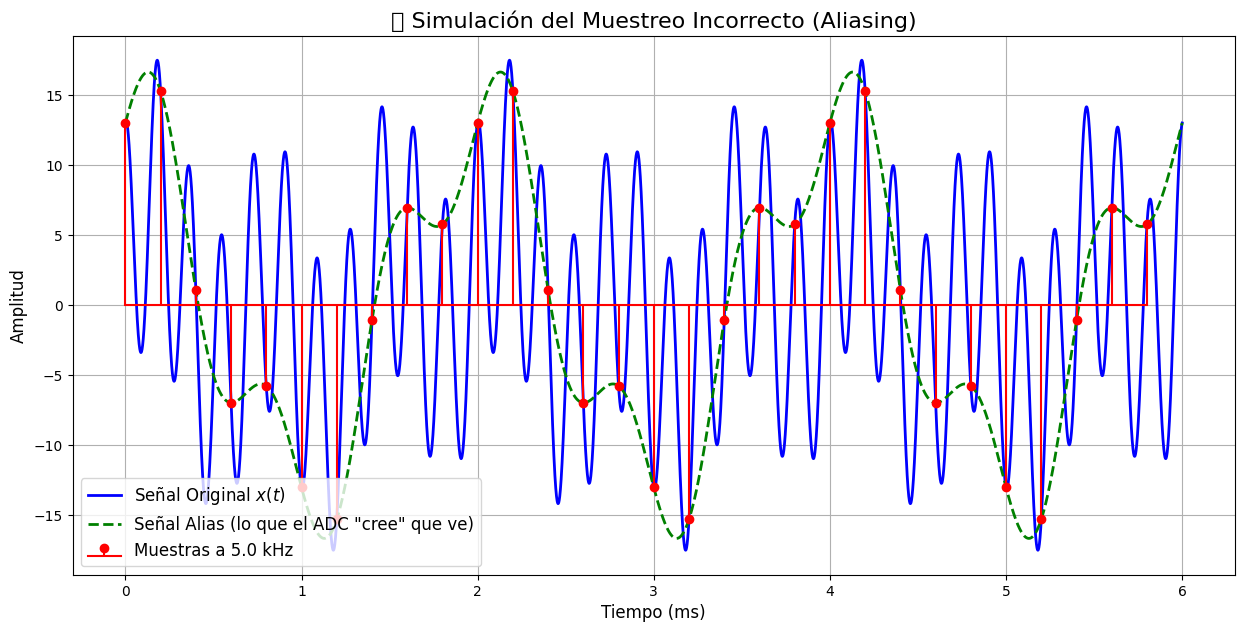

In [2]:
import matplotlib.pyplot as plt

# --- Parámetros de la señal y el ADC inicial ---
fs_bad = 5000  # Frecuencia de muestreo incorrecta (5 kHz)
Ts_bad = 1.0 / fs_bad
T0 = 0.002  # Periodo fundamental de la señal

# --- Dominio del tiempo ---
# Tiempo para la señal continua (alta resolución para graficar)
t_cont = np.linspace(0, 3 * T0, 10000)
# Tiempo discreto para el muestreo
t_disc_bad = np.arange(0, 3 * T0, Ts_bad)
n_bad = t_disc_bad / Ts_bad

# --- Señales en el tiempo ---
# Señal analógica original
x_t = 3 * np.cos(1000 * np.pi * t_cont) + 5 * np.sin(3000 * np.pi * t_cont) + 10 * np.cos(11000 * np.pi * t_cont)
# Muestras tomadas por el ADC incorrecto
x_n_bad = 3 * np.cos(1000 * np.pi * t_disc_bad) + 5 * np.sin(3000 * np.pi * t_disc_bad) + 10 * np.cos(11000 * np.pi * t_disc_bad)
# Señal de alias que las muestras realmente representan
x_alias_t = 13 * np.cos(1000 * np.pi * t_cont) + 5 * np.sin(3000 * np.pi * t_cont)

# --- Gráfica ---
plt.figure(figsize=(15, 7))
plt.plot(t_cont * 1000, x_t, 'b-', label='Señal Original $x(t)$', linewidth=2)
plt.plot(t_cont * 1000, x_alias_t, 'g--', label='Señal Alias (lo que el ADC "cree" que ve)', linewidth=2)
plt.stem(t_disc_bad * 1000, x_n_bad, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Muestras a {fs_bad/1000} kHz')

plt.title('❌ Simulación del Muestreo Incorrecto (Aliasing)', fontsize=16)
plt.xlabel('Tiempo (ms)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

**Señal  Modificada**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


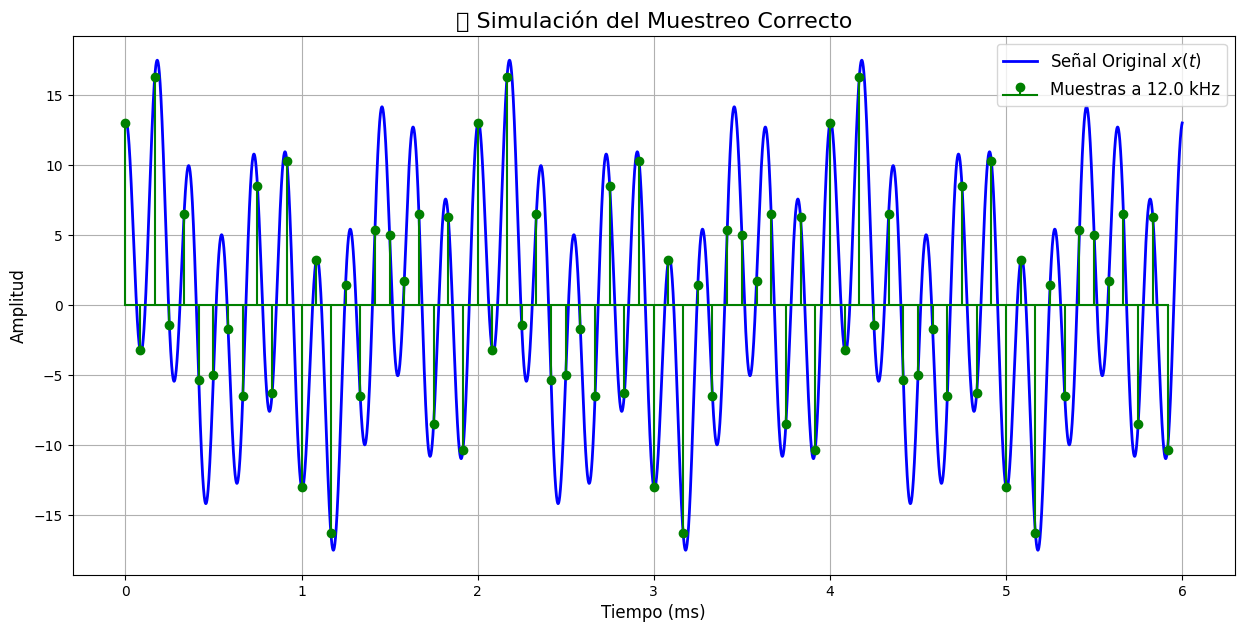

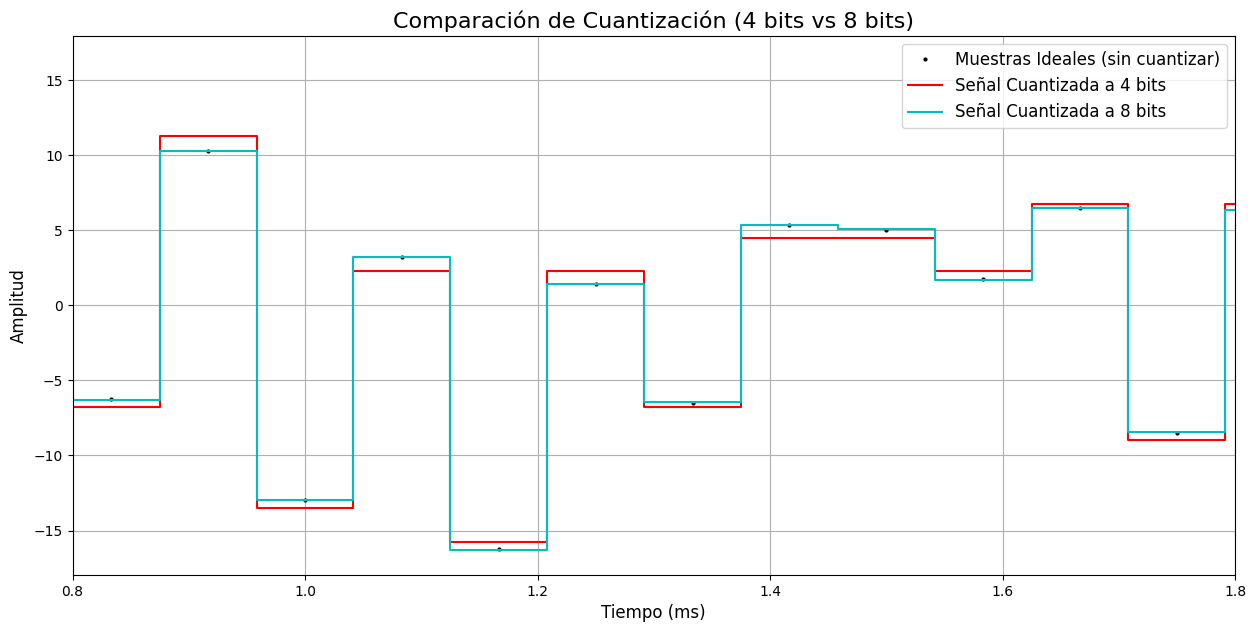

In [3]:
# --- Parámetros del ADC correcto ---
fs_good = 12000  # Frecuencia de muestreo correcta (12 kHz)
Ts_good = 1.0 / fs_good
bits_good = 8
bits_bad = 4

# --- Dominio del tiempo discreto correcto ---
t_disc_good = np.arange(0, 3 * T0, Ts_good)
x_n_good = 3 * np.cos(1000 * np.pi * t_disc_good) + 5 * np.sin(3000 * np.pi * t_disc_good) + 10 * np.cos(11000 * np.pi * t_disc_good)

# --- Cuantización ---
V_pp = 36.0 # Rango de la señal de -18 a 18
# Cuantizador de 4 bits
levels_bad = 2**bits_bad
delta_bad = V_pp / levels_bad
x_q_bad = delta_bad * np.round(x_n_good / delta_bad)
# Cuantizador de 8 bits
levels_good = 2**bits_good
delta_good = V_pp / levels_good
x_q_good = delta_good * np.round(x_n_good / delta_good)


# --- Gráfica del Muestreo Correcto ---
plt.figure(figsize=(15, 7))
plt.plot(t_cont * 1000, x_t, 'b-', label='Señal Original $x(t)$', linewidth=2)
plt.stem(t_disc_good * 1000, x_n_good, linefmt='g-', markerfmt='go', basefmt='g-', label=f'Muestras a {fs_good/1000} kHz')
plt.title('✅ Simulación del Muestreo Correcto', fontsize=16)
plt.xlabel('Tiempo (ms)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# --- Gráfica de Cuantización Comparativa ---
plt.figure(figsize=(15, 7))
plt.plot(t_disc_good * 1000, x_n_good, 'k.', markersize=4, label='Muestras Ideales (sin cuantizar)')
plt.step(t_disc_good * 1000, x_q_bad, 'r-', where='mid', label='Señal Cuantizada a 4 bits', linewidth=1.5)
plt.step(t_disc_good * 1000, x_q_good, 'c-', where='mid', label='Señal Cuantizada a 8 bits', linewidth=1.5)
plt.title('Comparación de Cuantización (4 bits vs 8 bits)', fontsize=16)
plt.xlabel('Tiempo (ms)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(fontsize=12)
plt.xlim(0.8, 1.8) # Zoom para ver el detalle de los escalones
plt.grid(True)
plt.show()

**Pregunta 4:**
Encuentre el espectro de Fourier, su parte real,
imaginaria, magnitud, fase y el error relativo para
$n∈{0,±1,±2,±3,±4,±5}$, a partir de $x′′(t)$ para la
señal $x(t)$ en la Figura 1 . Compruebe el espectro obtenido
con la estimacion a partir de $x(t)$. Presente las simulaciones
de Python respectivas.

Comparación de Coeficientes (Numérico vs. Analítico)
-----------------------------------------------------------------
  n |    Numérico (Real) |   Analítico (Real) |   Error Relativo (%)
-----------------------------------------------------------------
 -5 |        -0.19568878 |        -0.19568878 |         0.0000000000%
 -4 |         0.50660592 |         0.50660592 |         0.0000000000%
 -3 |        -0.54357995 |        -0.54357995 |         0.0000000000%
 -2 |        -2.02642367 |        -2.02642367 |         0.0000000000%
 -1 |         0.83937217 |         0.83937217 |         0.0000000000%
  0 |         3.75000000 |         3.75000000 |         0.0000000000%
  1 |         0.83937217 |         0.83937217 |         0.0000000000%
  2 |        -2.02642367 |        -2.02642367 |         0.0000000000%
  3 |        -0.54357995 |        -0.54357995 |         0.0000000000%
  4 |         0.50660592 |         0.50660592 |         0.0000000000%
  5 |        -0.19568878 |        -0.19568878 

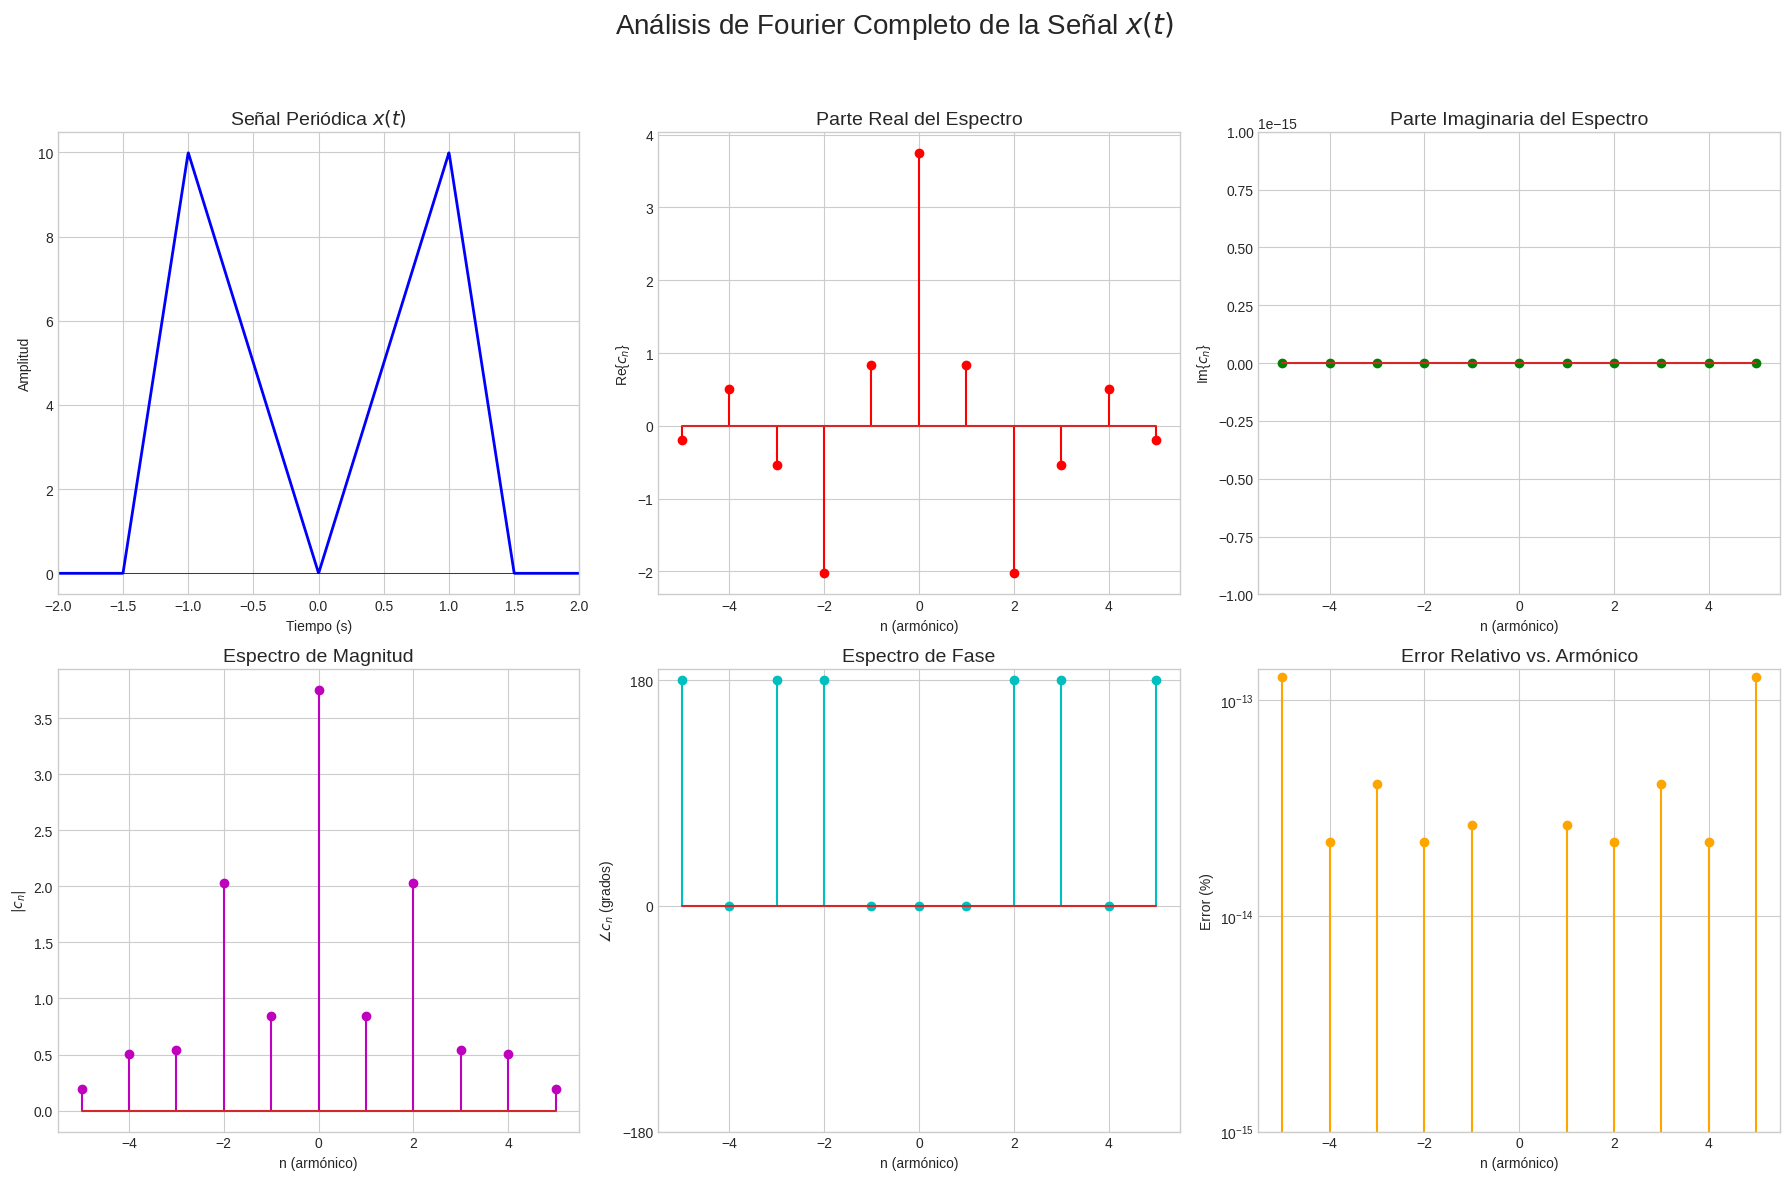

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# --- Parámetros de la simulación ---
A = 10.0
d1 = 1.0
d2 = 1.5
T = 4.0
w0 = 2 * np.pi / T

# --- 1. Definición de la señal x(t) ---
def x_t(t):
    # Aseguramos que t sea un array para operaciones vectoriales
    t = np.atleast_1d(t)
    # Tomamos el valor absoluto para aprovechar la simetría par
    t_abs = np.abs(t)
    # Usamos np.piecewise para definir la función a trozos
    return np.piecewise(t_abs,
                        [t_abs <= d1, (t_abs > d1) & (t_abs <= d2)],
                        [lambda t: A / d1 * t,              # Para 0 <= |t| <= d1
                         lambda t: A * (d2 - t) / (d2 - d1), # Para d1 < |t| <= d2
                         0])                                 # Resto de los casos

# --- 2. Cálculo de Coeficientes ---

# Método Numérico por Integración
def calculate_cn_numeric(n):
    real_integrand = lambda t: x_t(t) * np.cos(n * w0 * t)
    cn_real = (1/T) * quad(real_integrand, -T/2, T/2)[0]
    # La parte imaginaria es 0 por simetría, pero la calculamos para verificar
    imag_integrand = lambda t: x_t(t) * np.sin(n * w0 * t)
    cn_imag = -(1/T) * quad(imag_integrand, -T/2, T/2, limit=100)[0]
    return cn_real + 1j * cn_imag

# Método con la Fórmula Analítica Derivada
def calculate_cn_analytic(n):
    if n == 0:
        return (A * d2) / T
    else:
        # Términos de la fórmula
        term1 = 1 / d1
        term2 = (d2 / (d1 * (d2 - d1))) * np.cos(n * w0 * d1)
        term3 = (1 / (d2 - d1)) * np.cos(n * w0 * d2)
        # Factor multiplicador
        factor = -2 * A / (T * (n**2) * (w0**2))
        return factor * (term1 - term2 + term3)

# --- 3. Procesamiento y Cálculo de Errores ---
n_vals = np.arange(-5, 6, 1)
cn_numeric = np.array([calculate_cn_numeric(n) for n in n_vals])
cn_analytic = np.array([calculate_cn_analytic(n) for n in n_vals])

# Calcular error relativo porcentual
# Evitamos división por cero si el valor analítico es 0
relative_error = np.where(
    np.abs(cn_analytic) > 1e-15,
    100 * np.abs(cn_numeric.real - cn_analytic) / np.abs(cn_analytic),
    0
)

# Impresión de la tabla de resultados
print("Comparación de Coeficientes (Numérico vs. Analítico)")
print("-" * 65)
print(f"{'n':>3s} | {'Numérico (Real)':>18s} | {'Analítico (Real)':>18s} | {'Error Relativo (%)':>20s}")
print("-" * 65)
for i, n in enumerate(n_vals):
    print(f"{n:3d} | {cn_numeric[i].real:18.8f} | {cn_analytic[i]:18.8f} | {relative_error[i]:20.10f}%")
print("-" * 65)


# --- 4. Visualización Gráfica ---
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3) # Creamos una rejilla de 2x3

# Gráfica de la señal x(t)
ax1 = fig.add_subplot(gs[0, 0])
t_plot = np.linspace(-T/2, T/2, 1000)
ax1.plot(t_plot, x_t(t_plot), 'b', linewidth=2)
ax1.set_title('Señal Periódica $x(t)$', fontsize=14)
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud')
ax1.set_xlim(-T/2, T/2)
ax1.axhline(0, color='black', linewidth=0.5)

# Parte Real
ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(n_vals, cn_analytic.real, 'r')
ax2.set_title('Parte Real del Espectro', fontsize=14)
ax2.set_xlabel('n (armónico)')
ax2.set_ylabel('Re{$c_n$}')

# Parte Imaginaria
ax3 = fig.add_subplot(gs[0, 2])
ax3.stem(n_vals, cn_numeric.imag, 'g') # Usamos el numérico para ver el error
ax3.set_title('Parte Imaginaria del Espectro', fontsize=14)
ax3.set_xlabel('n (armónico)')
ax3.set_ylabel('Im{$c_n$}')
ax3.set_ylim([-1e-15, 1e-15]) # El error de cómputo es muy pequeño

# Magnitud
ax4 = fig.add_subplot(gs[1, 0])
ax4.stem(n_vals, np.abs(cn_analytic), 'm')
ax4.set_title('Espectro de Magnitud', fontsize=14)
ax4.set_xlabel('n (armónico)')
ax4.set_ylabel('$|c_n|$')

# Fase
ax5 = fig.add_subplot(gs[1, 1])
phase = np.angle(cn_analytic, deg=True)
ax5.stem(n_vals, phase, 'c')
ax5.set_title('Espectro de Fase', fontsize=14)
ax5.set_xlabel('n (armónico)')
ax5.set_ylabel('$\\angle c_n$ (grados)')
ax5.set_yticks([-180, 0, 180])

# Error Relativo
ax6 = fig.add_subplot(gs[1, 2])
ax6.stem(n_vals, relative_error, 'orange')
ax6.set_title('Error Relativo vs. Armónico', fontsize=14)
ax6.set_xlabel('n (armónico)')
ax6.set_ylabel('Error (%)')
ax6.set_yscale('log') # Escala logarítmica para ver errores pequeños
ax6.set_ylim(bottom=1e-15) # Establecer límite inferior para la escala logarítmica

fig.suptitle('Análisis de Fourier Completo de la Señal $x(t)$', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()